<a href="https://colab.research.google.com/github/WHU-Peter/COMP6247-Reinforcement-and-Online-Learning/blob/main/Assignment1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

seed = 7
np.random.seed(seed)

In [2]:
def sigmoid(theta, x):
  return 1 / (1 + np.exp(-(x @ theta.T)))

[ 4. -4.]
0.0025309271808513605
0.005175279452863132
(2000, 2)
(2000,)


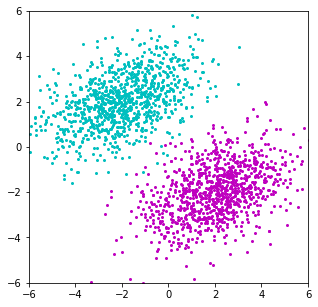

In [54]:
# 每个分类样本数量
N = 1000

# 初始化高斯分布的均值和协方差
alpha = 2
u1 = np.array([-alpha, alpha])
u2 = np.array([alpha, -alpha])
C1 = np.array([[2, 1], [1, 2]])
C2 = C1

# 根据高斯线性判别分析得知真实分界线的theta
theta = (np.linalg.inv(C2) @ u2 - np.linalg.inv(C1) @ u1)
print(theta)

# 生成数据
A = np.linalg.cholesky(C1)
X1 = np.random.randn(N, 2)
X1 = X1 @ A
X1 = X1 + u1

X2 = np.random.randn(N, 2)
X2 = X2 @ A
X2 = X2 + u2

ex = np.random.randn(N)
Y1 = sigmoid(theta, X1) + 0.001*ex

ex = np.random.randn(N)
Y2 = sigmoid(theta, X2) + 0.001*ex

print(np.var(Y1))
print(np.var(Y2))

X = np.append(X1, X2, axis=0)
Y = np.append(Y1, Y2, axis=0)

shuffle_indexes = np.random.permutation(2*N)
X = X[shuffle_indexes]
Y = Y[shuffle_indexes]
print(X.shape)
print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()

R = 0.001, beta = 0.01000


Text(0.5, 1.0, 'theta parameters 2')

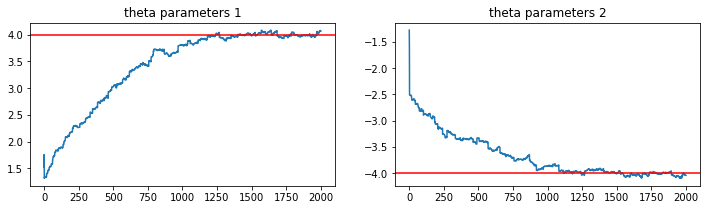

In [55]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

def PF(x, y, beta, R):
    sample_num = 100
    th_conv = np.zeros([2, 2*N])
    
    th_sample = np.random.randn(sample_num,2)
    w = np.ones((sample_num,1))
    for t in range(0, 2*N):
        xn = x[t].reshape((2, 1))
        for i in range(sample_num):
            th_sample[i] = th_sample[i] + beta*np.random.randn(1,2)
            w[i] = stats.norm(loc=sigmoid(th_sample[i], xn.T), scale=R).pdf(y[t])*w[i]
        w += 1.e-300
        w = w/(np.sum(w))
        
        if neff(w) < sample_num:
            w_resample = np.cumsum(w)
            w_resample[-1] = 1.  # avoid round-off error
            indexes = np.searchsorted(w_resample, np.random.rand(sample_num))
            # resample according to indexes
            th_sample = th_sample[indexes]
            w.fill(1.0 / sample_num)
        
        th_conv_t = (th_sample.T @ w)
        th_conv[0,t] = th_conv_t[0]
        th_conv[1,t] = th_conv_t[1]
    
    return th_conv

beta = 0.01
R = 0.001
print("R = %4.3f, beta = %6.5f" %(R, beta))
th_conv = PF(X, Y, beta, R)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv[0])
ax[0].axhline(y=theta[0], color='r')
ax[0].set_title("theta parameters 1" )
ax[1].plot(th_conv[1])
ax[1].axhline(y=theta[1], color='r')
ax[1].set_title("theta parameters 2")

[ 6. -6.]
0.000115013774153989
2.8095272818227358e-05
(20000, 2)
(20000,)


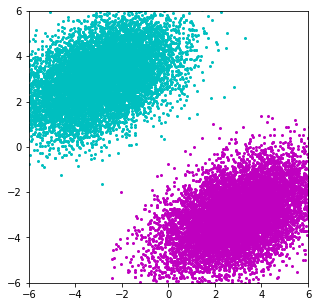

In [51]:
# 每个分类样本数量
N = 10000

# 初始化高斯分布的均值和协方差
alpha = 3
u1 = np.array([-alpha, alpha])
u2 = np.array([alpha, -alpha])
C1 = np.array([[2, 1], [1, 2]])
C2 = C1

# 根据高斯线性判别分析得知真实分界线的theta
theta = (np.linalg.inv(C2) @ u2 - np.linalg.inv(C1) @ u1)
print(theta)

# 生成数据
A = np.linalg.cholesky(C1)
X1 = np.random.randn(N, 2)
X1 = X1 @ A
X1 = X1 + u1

X2 = np.random.randn(N, 2)
X2 = X2 @ A
X2 = X2 + u2

ex = np.random.randn(N)
Y1 = sigmoid(theta, X1) + 0.00001*ex

ex = np.random.randn(N)
Y2 = sigmoid(theta, X2) + 0.00001*ex

print(np.var(Y1))
print(np.var(Y2))

X = np.append(X1, X2, axis=0)
Y = np.append(Y1, Y2, axis=0)

shuffle_indexes = np.random.permutation(2*N)
X = X[shuffle_indexes]
Y = Y[shuffle_indexes]
print(X.shape)
print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()

R = 0.000, beta = 0.01000


Text(0.5, 1.0, 'theta parameters 2')

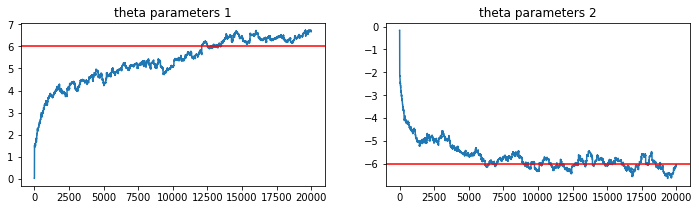

In [53]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

def PF(x, y, beta, R):
    sample_num = 100
    th_conv = np.zeros([2, 2*N])
    
    th_sample = np.random.randn(sample_num,2)
    w = np.ones((sample_num,1))
    for t in range(0, 2*N):
        xn = x[t].reshape((2, 1))
        for i in range(sample_num):
            th_sample[i] = th_sample[i] + beta*np.random.randn(1,2)
            w[i] = stats.norm(loc=sigmoid(th_sample[i], xn.T), scale=R).pdf(y[t])*w[i]
        w += 1.e-300
        w = w/(np.sum(w))
        
        if neff(w) < sample_num:
            w_resample = np.cumsum(w)
            w_resample[-1] = 1.  # avoid round-off error
            indexes = np.searchsorted(w_resample, np.random.rand(sample_num))
            # resample according to indexes
            th_sample = th_sample[indexes]
            w.fill(1.0 / sample_num)
        
        th_conv_t = (th_sample.T @ w)
        th_conv[0,t] = th_conv_t[0]
        th_conv[1,t] = th_conv_t[1]
    
    return th_conv

beta = 0.01
R = 0.000001
print("R = %4.3f, beta = %6.5f" %(R, beta))
th_conv = PF(X, Y, beta, R)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
ax[0].plot(th_conv[0])
ax[0].axhline(y=theta[0], color='r')
ax[0].set_title("theta parameters 1" )
ax[1].plot(th_conv[1])
ax[1].axhline(y=theta[1], color='r')
ax[1].set_title("theta parameters 2")